# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

18:09:48 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=84687;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=955636;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#47\47]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=639454;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=219654;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#68\68]8;;\
                  will not be available.                                                                           

18:09:49 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=172307;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=767159;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

18:09:51 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=79138;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=6589;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

18:09:52 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=959591;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=118443;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

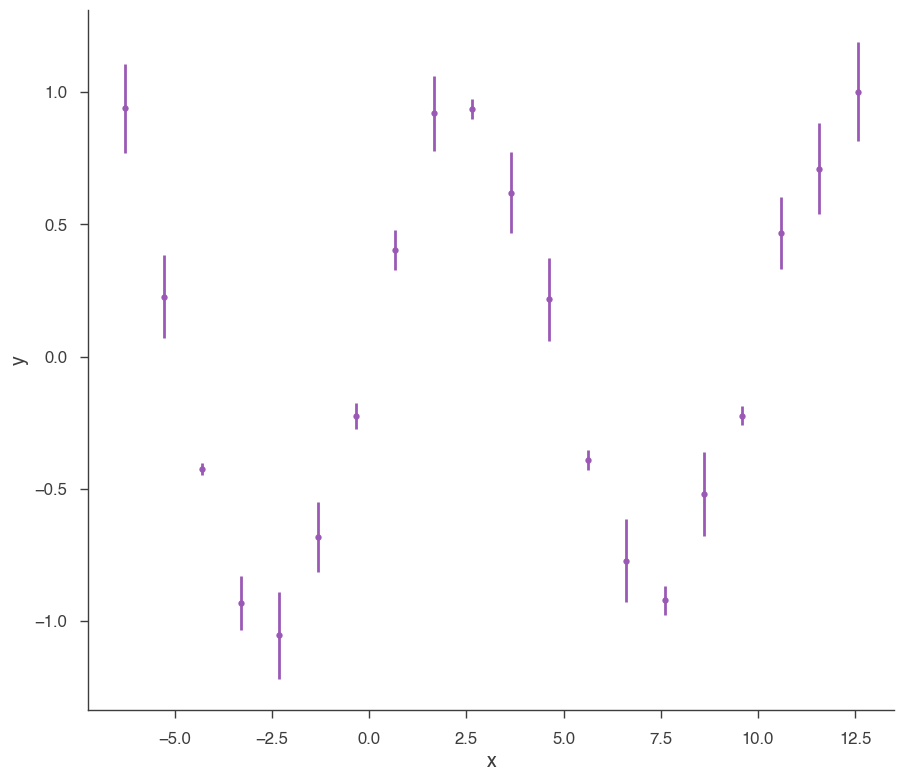

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=980441;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=697735;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

18:09:56 INFO      Mean acceptance fraction: 0.7085                                            ]8;id=775409;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=309345;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

18:09:57 INFO      fit restored to maximum of posterior                                         ]8;id=702627;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=945557;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=567768;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=366524;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.66 +/- 0.23) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.004 +/- 0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-4.606603
total,-4.606603


Values of statistical measures:

,statistical measures
AIC,13.919089
BIC,15.204672
DIC,13.324511
PDIC,2.055649


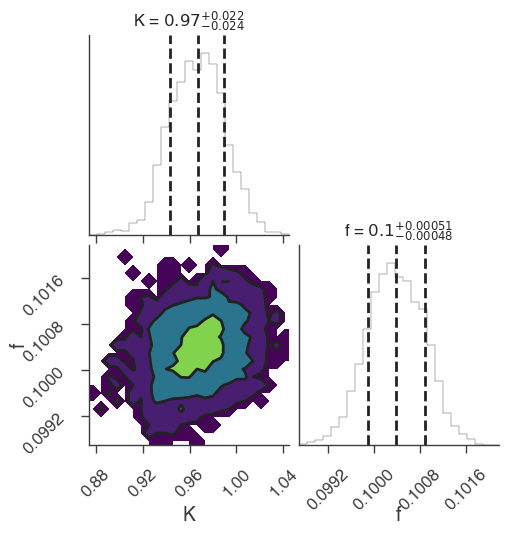

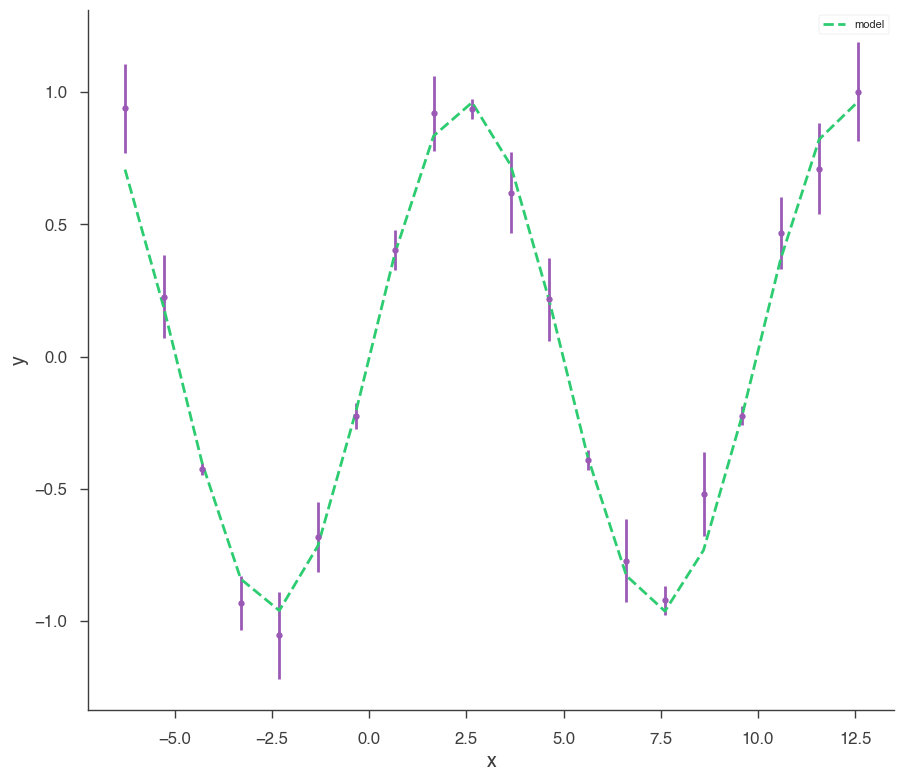

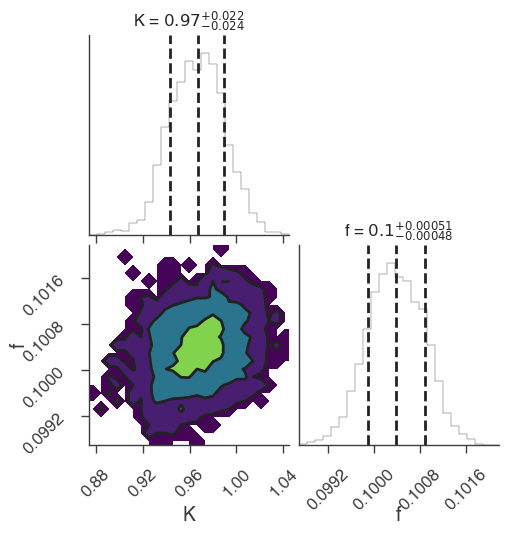

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

18:09:58 INFO      sampler set to multinest                                                ]8;id=841525;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=188033;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************

 MultiNest Warning!
 Parameter            2  of mode            6  is converging towards the edge of the prior.


  analysing data from chains/fit-.txt ln(ev)=  -14.172366700959925      +/-  0.14567066826021396     
 Total Likelihood Evaluations:         5277
 Sampling finished. Exiting MultiNest



18:09:59 INFO      fit restored to maximum of posterior                                         ]8;id=146893;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=731629;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=243524;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=422980;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 -0.26 +0.23) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.004 -0.005 +0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-4.607639
total,-4.607639


Values of statistical measures:

,statistical measures
AIC,13.921160
BIC,15.206742
DIC,13.534325
PDIC,2.157597
log(Z),-6.154981


         INFO      deleting the chain directory chains                                     ]8;id=907616;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=336004;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

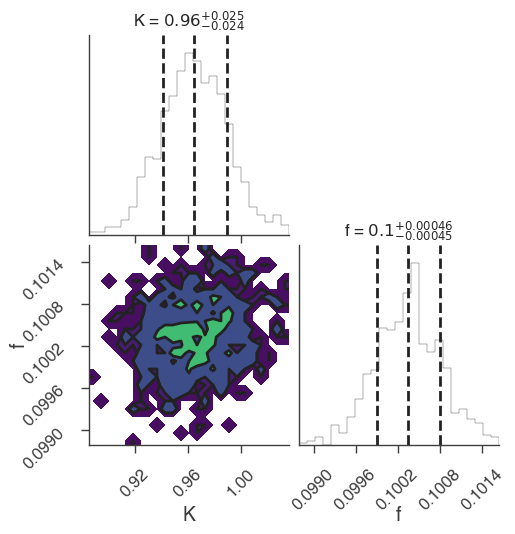

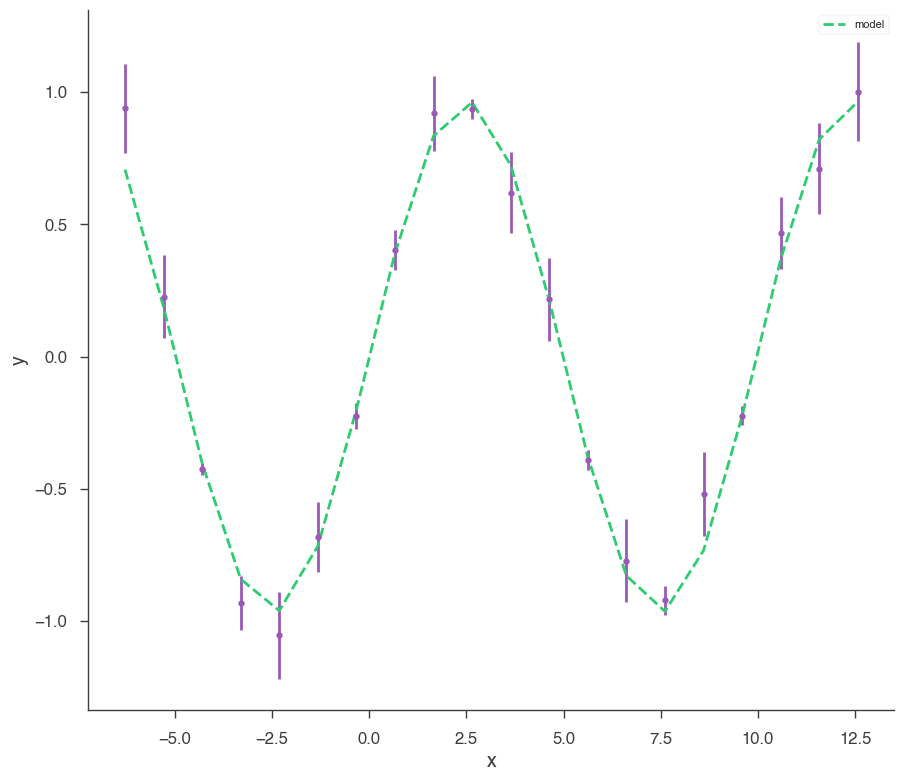

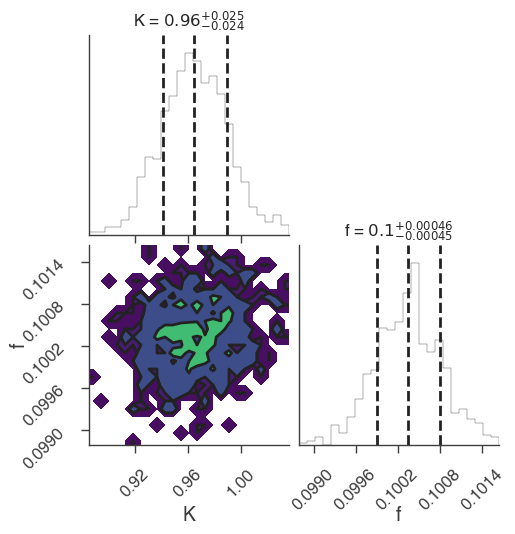

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

18:10:00 INFO      sampler set to dynesty_nested                                           ]8;id=983156;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=657463;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

159it [00:00, 1584.82it/s, bound: 0 | nc: 1 | ncall: 603 | eff(%): 26.368 | loglstar:   -inf < -2188.855 <    inf | logz: -2194.408 +/-  0.116 | dlogz: 2153.225 >  0.409]

318it [00:00, 1417.36it/s, bound: 0 | nc: 2 | ncall: 891 | eff(%): 35.690 | loglstar:   -inf < -1637.767 <    inf | logz: -1644.975 +/-  0.128 | dlogz: 1640.382 >  0.409]

483it [00:00, 1515.01it/s, bound: 0 | nc: 3 | ncall: 1274 | eff(%): 37.912 | loglstar:   -inf < -1299.474 <    inf | logz: -1306.606 +/-  0.126 | dlogz: 1300.687 >  0.409]

636it [00:00, 1277.63it/s, bound: 0 | nc: 1 | ncall: 1864 | eff(%): 34.120 | loglstar:   -inf < -1052.053 <    inf | logz: -1059.897 +/-  0.131 | dlogz: 1053.993 >  0.409]

769it [00:00, 1073.67it/s, bound: 0 | nc: 15 | ncall: 2608 | eff(%): 29.486 | loglstar:   -inf < -829.169 <    inf | logz: -837.426 +/-  0.137 | dlogz: 831.557 >  0.409]  

883it [00:00, 814.52it/s, bound: 0 | nc: 1 | ncall: 3571 | eff(%): 24.727 | loglstar:   -inf < -634.570 <    inf | logz: -642.857 +/-  0.139 | dlogz: 636.817 >  0.409]  

976it [00:01, 672.35it/s, bound: 0 | nc: 9 | ncall: 4639 | eff(%): 21.039 | loglstar:   -inf < -533.634 <    inf | logz: -542.169 +/-  0.139 | dlogz: 535.636 >  0.409]

1053it [00:01, 622.97it/s, bound: 0 | nc: 1 | ncall: 5678 | eff(%): 18.545 | loglstar:   -inf < -479.271 <    inf | logz: -487.786 +/-  0.137 | dlogz: 480.868 >  0.409]

1121it [00:01, 538.93it/s, bound: 0 | nc: 3 | ncall: 6575 | eff(%): 17.049 | loglstar:   -inf < -453.100 <    inf | logz: -461.017 +/-  0.134 | dlogz: 453.514 >  0.409]

1180it [00:01, 458.17it/s, bound: 0 | nc: 40 | ncall: 7607 | eff(%): 15.512 | loglstar:   -inf < -397.099 <    inf | logz: -406.273 +/-  0.144 | dlogz: 399.380 >  0.409]

1230it [00:01, 382.15it/s, bound: 0 | nc: 24 | ncall: 8588 | eff(%): 14.322 | loglstar:   -inf < -337.817 <    inf | logz: -347.236 +/-  0.147 | dlogz: 340.522 >  0.409]

1272it [00:01, 371.91it/s, bound: 0 | nc: 11 | ncall: 9303 | eff(%): 13.673 | loglstar:   -inf < -292.163 <    inf | logz: -301.870 +/-  0.152 | dlogz: 295.714 >  0.409]

1312it [00:02, 331.98it/s, bound: 0 | nc: 12 | ncall: 10183 | eff(%): 12.884 | loglstar:   -inf < -268.261 <    inf | logz: -276.831 +/-  0.140 | dlogz: 268.899 >  0.409]

1347it [00:02, 286.04it/s, bound: 0 | nc: 9 | ncall: 11200 | eff(%): 12.027 | loglstar:   -inf < -241.361 <    inf | logz: -249.928 +/-  0.138 | dlogz: 241.947 >  0.409] 

1377it [00:02, 265.36it/s, bound: 0 | nc: 5 | ncall: 12097 | eff(%): 11.383 | loglstar:   -inf < -227.500 <    inf | logz: -236.482 +/-  0.139 | dlogz: 228.555 >  0.409]

1404it [00:02, 214.22it/s, bound: 0 | nc: 13 | ncall: 13152 | eff(%): 10.675 | loglstar:   -inf < -214.324 <    inf | logz: -222.690 +/-  0.139 | dlogz: 214.426 >  0.409]

1430it [00:02, 218.25it/s, bound: 0 | nc: 163 | ncall: 14022 | eff(%): 10.198 | loglstar:   -inf < -200.662 <    inf | logz: -209.489 +/-  0.140 | dlogz: 201.283 >  0.409]

1453it [00:03, 174.96it/s, bound: 1 | nc: 1 | ncall: 14458 | eff(%): 10.050 | loglstar:   -inf < -190.375 <    inf | logz: -199.767 +/-  0.144 | dlogz: 191.833 >  0.409]  

1604it [00:03, 432.19it/s, bound: 1 | nc: 1 | ncall: 14694 | eff(%): 10.916 | loglstar:   -inf < -143.471 <    inf | logz: -152.099 +/-  0.137 | dlogz: 143.226 >  0.409]

1722it [00:03, 593.21it/s, bound: 1 | nc: 4 | ncall: 14926 | eff(%): 11.537 | loglstar:   -inf < -108.847 <    inf | logz: -117.727 +/-  0.140 | dlogz: 108.568 >  0.409]

1799it [00:03, 507.41it/s, bound: 2 | nc: 2 | ncall: 15075 | eff(%): 11.934 | loglstar:   -inf < -93.754 <    inf | logz: -102.674 +/-  0.142 | dlogz: 93.431 >  0.409]  

2013it [00:03, 853.18it/s, bound: 2 | nc: 1 | ncall: 15406 | eff(%): 13.066 | loglstar:   -inf < -57.288 <    inf | logz: -66.025 +/-  0.140 | dlogz: 56.163 >  0.409] 

2129it [00:03, 714.49it/s, bound: 3 | nc: 1 | ncall: 15649 | eff(%): 13.605 | loglstar:   -inf < -45.128 <    inf | logz: -54.171 +/-  0.141 | dlogz: 44.304 >  0.409]

2304it [00:03, 925.88it/s, bound: 3 | nc: 2 | ncall: 15936 | eff(%): 14.458 | loglstar:   -inf < -31.197 <    inf | logz: -39.944 +/-  0.141 | dlogz: 29.585 >  0.409]

2469it [00:04, 851.62it/s, bound: 4 | nc: 2 | ncall: 16261 | eff(%): 15.184 | loglstar:   -inf < -22.700 <    inf | logz: -31.656 +/-  0.142 | dlogz: 20.890 >  0.409]

2632it [00:04, 1007.85it/s, bound: 4 | nc: 1 | ncall: 16501 | eff(%): 15.951 | loglstar:   -inf < -16.824 <    inf | logz: -25.810 +/-  0.141 | dlogz: 14.624 >  0.409]

2778it [00:04, 1105.54it/s, bound: 4 | nc: 5 | ncall: 16811 | eff(%): 16.525 | loglstar:   -inf < -13.062 <    inf | logz: -21.912 +/-  0.142 | dlogz: 10.351 >  0.409]

2907it [00:04, 901.39it/s, bound: 5 | nc: 4 | ncall: 16996 | eff(%): 17.104 | loglstar:   -inf < -10.792 <    inf | logz: -19.870 +/-  0.141 | dlogz:  7.986 >  0.409] 

3062it [00:04, 1038.04it/s, bound: 5 | nc: 4 | ncall: 17280 | eff(%): 17.720 | loglstar:   -inf < -8.954 <    inf | logz: -17.973 +/-  0.142 | dlogz:  5.699 >  0.409]

3184it [00:04, 874.48it/s, bound: 6 | nc: 1 | ncall: 17520 | eff(%): 18.174 | loglstar:   -inf < -7.847 <    inf | logz: -16.914 +/-  0.142 | dlogz:  4.343 >  0.409] 

3319it [00:04, 974.41it/s, bound: 6 | nc: 1 | ncall: 17711 | eff(%): 18.740 | loglstar:   -inf < -7.012 <    inf | logz: -16.041 +/-  0.142 | dlogz:  3.161 >  0.409]

3465it [00:04, 1086.75it/s, bound: 6 | nc: 4 | ncall: 17994 | eff(%): 19.256 | loglstar:   -inf < -6.239 <    inf | logz: -15.364 +/-  0.142 | dlogz:  2.193 >  0.409]

3588it [00:05, 963.29it/s, bound: 7 | nc: 1 | ncall: 18179 | eff(%): 19.737 | loglstar:   -inf < -5.801 <    inf | logz: -14.936 +/-  0.142 | dlogz:  1.571 >  0.409] 

3775it [00:05, 1174.73it/s, bound: 7 | nc: 2 | ncall: 18472 | eff(%): 20.436 | loglstar:   -inf < -5.366 <    inf | logz: -14.488 +/-  0.142 | dlogz:  0.927 >  0.409]

3907it [00:05, 961.96it/s, bound: 8 | nc: 1 | ncall: 18728 | eff(%): 20.862 | loglstar:   -inf < -5.160 <    inf | logz: -14.282 +/-  0.142 | dlogz:  0.638 >  0.409] 

4063it [00:05, 1094.04it/s, bound: 8 | nc: 2 | ncall: 18990 | eff(%): 21.395 | loglstar:   -inf < -4.988 <    inf | logz: -14.109 +/-  0.142 | dlogz:  0.412 >  0.409]

4065it [00:05, 720.29it/s, +400 | bound: 8 | nc: 1 | ncall: 19394 | eff(%): 23.507 | loglstar:   -inf < -4.641 <    inf | logz: -13.753 +/-  0.142 | dlogz:  0.001 >  0.409]

18:10:06 INFO      fit restored to maximum of posterior                                         ]8;id=33452;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=390306;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=442968;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=992553;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 -0.24 +0.23) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.004 -0.005 +0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-4.60664
total,-4.60664


Values of statistical measures:

,statistical measures
AIC,13.919162
BIC,15.204744
DIC,13.195447
PDIC,1.990572
log(Z),-5.972694


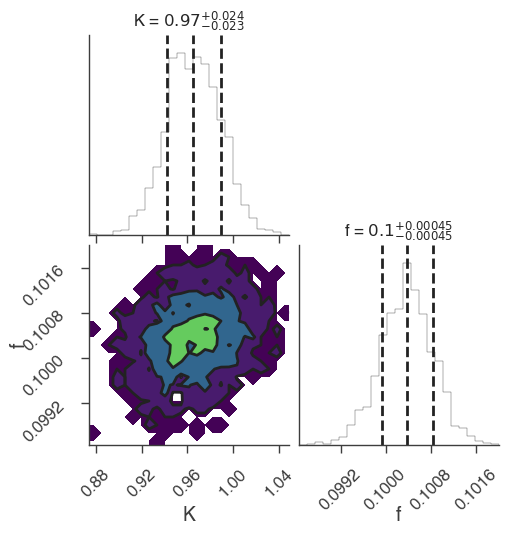

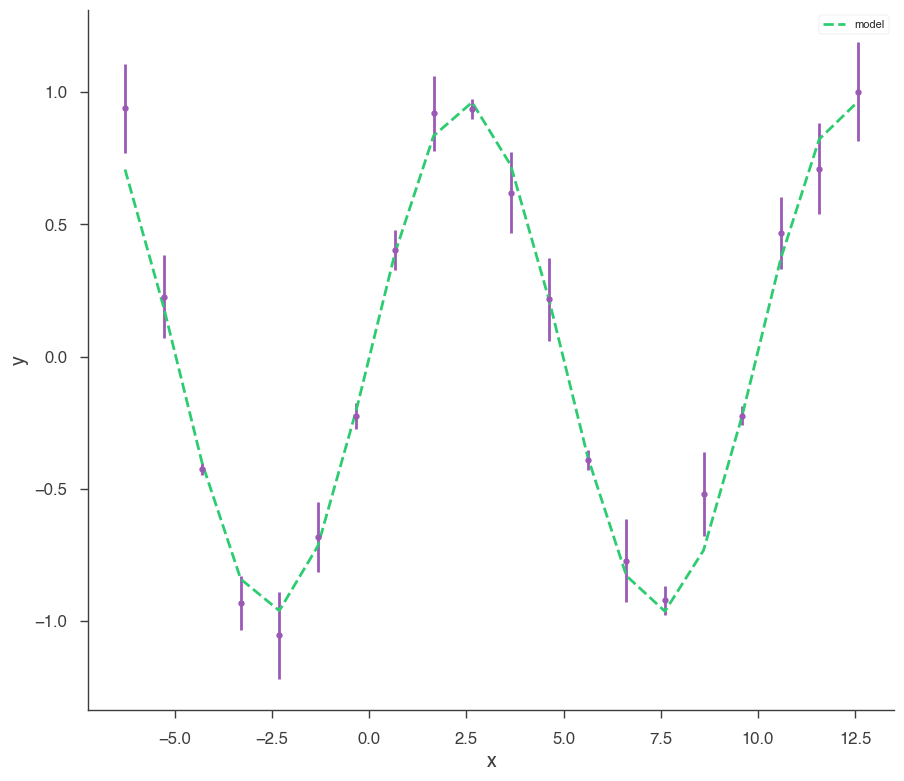

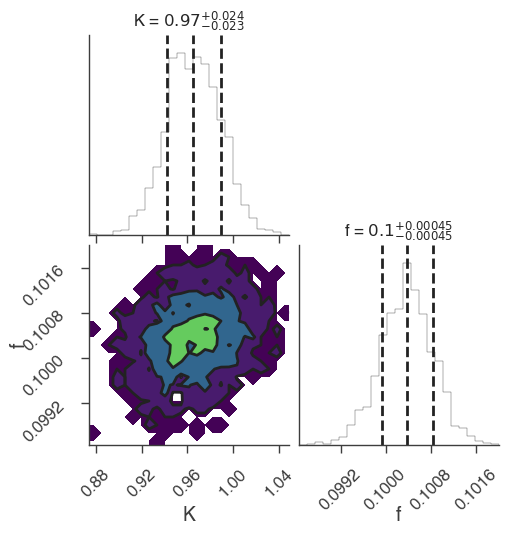

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

18:10:07 INFO      sampler set to dynesty_dynamic                                          ]8;id=330803;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=27209;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

113it [00:00, 1128.01it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 128 | eff(%): 17.994 | loglstar:   -inf < -2847.394 <    inf | logz: -2854.528 +/-  0.119 | dlogz: 2833.543 >  0.010]

273it [00:00, 1403.43it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 355 | eff(%): 31.930 | loglstar:   -inf < -1972.149 <    inf | logz: -1979.602 +/-  0.122 | dlogz: 1971.881 >  0.010]

465it [00:00, 1632.57it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 709 | eff(%): 38.462 | loglstar:   -inf < -1543.726 <    inf | logz: -1551.529 +/-  0.124 | dlogz: 1537.045 >  0.010]

629it [00:00, 1362.48it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 1186 | eff(%): 37.307 | loglstar:   -inf < -1296.227 <    inf | logz: -1303.597 +/-  0.115 | dlogz: 1285.841 >  0.010]

771it [00:00, 1262.52it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 1675 | eff(%): 35.448 | loglstar:   -inf < -1144.897 <    inf | logz: -1152.214 +/-  0.117 | dlogz: 1146.695 >  0.010]

902it [00:00, 1104.87it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2326 | eff(%): 31.918 | loglstar:   -inf < -940.730 <    inf | logz: -948.986 +/-  0.122 | dlogz: 943.903 >  0.010]   

1018it [00:00, 869.02it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 3081 | eff(%): 28.428 | loglstar:   -inf < -762.575 <    inf | logz: -770.080 +/-  0.118 | dlogz: 763.834 >  0.010]

1114it [00:01, 745.32it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 3871 | eff(%): 25.486 | loglstar:   -inf < -640.350 <    inf | logz: -648.441 +/-  0.120 | dlogz: 642.223 >  0.010]

1196it [00:01, 697.55it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 4622 | eff(%): 23.350 | loglstar:   -inf < -567.902 <    inf | logz: -576.107 +/-  0.120 | dlogz: 569.740 >  0.010]

1271it [00:01, 642.01it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 5514 | eff(%): 21.134 | loglstar:   -inf < -510.466 <    inf | logz: -518.309 +/-  0.120 | dlogz: 511.558 >  0.010]

1338it [00:01, 591.75it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 6369 | eff(%): 19.479 | loglstar:   -inf < -481.885 <    inf | logz: -489.183 +/-  0.117 | dlogz: 482.013 >  0.010] 

1399it [00:01, 506.65it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 7275 | eff(%): 17.994 | loglstar:   -inf < -459.722 <    inf | logz: -467.784 +/-  0.119 | dlogz: 460.704 >  0.010]

1452it [00:01, 483.05it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 8035 | eff(%): 17.012 | loglstar:   -inf < -436.468 <    inf | logz: -444.862 +/-  0.124 | dlogz: 437.846 >  0.010] 

1502it [00:02, 451.35it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 8715 | eff(%): 16.300 | loglstar:   -inf < -388.383 <    inf | logz: -396.691 +/-  0.123 | dlogz: 389.453 >  0.010]

1548it [00:02, 396.63it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 9669 | eff(%): 15.223 | loglstar:   -inf < -337.786 <    inf | logz: -346.647 +/-  0.128 | dlogz: 339.582 >  0.010] 

1589it [00:02, 377.62it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 10428 | eff(%): 14.541 | loglstar:   -inf < -304.491 <    inf | logz: -313.192 +/-  0.124 | dlogz: 305.786 >  0.010]

1627it [00:02, 337.19it/s, batch: 0 | bound: 0 | nc: 64 | ncall: 11289 | eff(%): 13.801 | loglstar:   -inf < -274.587 <    inf | logz: -283.985 +/-  0.130 | dlogz: 276.895 >  0.010]

1662it [00:02, 248.48it/s, batch: 0 | bound: 0 | nc: 44 | ncall: 12474 | eff(%): 12.810 | loglstar:   -inf < -250.102 <    inf | logz: -259.828 +/-  0.132 | dlogz: 253.042 >  0.010]

1690it [00:02, 225.06it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 13172 | eff(%): 12.361 | loglstar:   -inf < -236.844 <    inf | logz: -245.735 +/-  0.123 | dlogz: 238.098 >  0.010] 

1715it [00:03, 206.61it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 13986 | eff(%): 11.839 | loglstar:   -inf < -226.238 <    inf | logz: -235.504 +/-  0.126 | dlogz: 227.939 >  0.010]

1737it [00:03, 175.22it/s, batch: 0 | bound: 0 | nc: 139 | ncall: 14899 | eff(%): 11.280 | loglstar:   -inf < -217.813 <    inf | logz: -226.465 +/-  0.127 | dlogz: 218.682 >  0.010]

1760it [00:03, 175.90it/s, batch: 0 | bound: 0 | nc: 140 | ncall: 15682 | eff(%): 10.876 | loglstar:   -inf < -206.536 <    inf | logz: -215.583 +/-  0.126 | dlogz: 207.836 >  0.010]

1779it [00:03, 167.19it/s, batch: 0 | bound: 0 | nc: 74 | ncall: 16341 | eff(%): 10.564 | loglstar:   -inf < -198.520 <    inf | logz: -207.441 +/-  0.127 | dlogz: 199.631 >  0.010] 

1797it [00:03, 162.96it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 16797 | eff(%): 10.389 | loglstar:   -inf < -192.491 <    inf | logz: -201.443 +/-  0.127 | dlogz: 193.566 >  0.010] 

1814it [00:03, 139.85it/s, batch: 0 | bound: 0 | nc: 118 | ncall: 17463 | eff(%): 10.099 | loglstar:   -inf < -187.747 <    inf | logz: -196.323 +/-  0.125 | dlogz: 188.283 >  0.010]

1829it [00:04, 101.79it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17791 | eff(%):  9.999 | loglstar:   -inf < -183.785 <    inf | logz: -192.647 +/-  0.124 | dlogz: 184.576 >  0.010]  

1935it [00:04, 275.91it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17919 | eff(%): 10.505 | loglstar:   -inf < -154.582 <    inf | logz: -163.650 +/-  0.125 | dlogz: 155.360 >  0.010]

2032it [00:04, 419.00it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18064 | eff(%): 10.946 | loglstar:   -inf < -132.823 <    inf | logz: -141.414 +/-  0.123 | dlogz: 132.820 >  0.010]

2129it [00:04, 543.92it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 18233 | eff(%): 11.365 | loglstar:   -inf < -111.958 <    inf | logz: -120.997 +/-  0.126 | dlogz: 112.282 >  0.010]

2210it [00:04, 606.31it/s, batch: 0 | bound: 1 | nc: 7 | ncall: 18385 | eff(%): 11.702 | loglstar:   -inf < -98.669 <    inf | logz: -107.427 +/-  0.124 | dlogz: 98.426 >  0.010]  

2283it [00:04, 444.48it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18534 | eff(%): 11.994 | loglstar:   -inf < -88.666 <    inf | logz: -97.293 +/-  0.124 | dlogz: 88.122 >  0.010] 

2443it [00:04, 680.39it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18742 | eff(%): 12.696 | loglstar:   -inf < -70.237 <    inf | logz: -78.995 +/-  0.124 | dlogz: 69.484 >  0.010]

2595it [00:04, 868.58it/s, batch: 0 | bound: 2 | nc: 6 | ncall: 19004 | eff(%): 13.305 | loglstar:   -inf < -53.886 <    inf | logz: -63.281 +/-  0.127 | dlogz: 53.497 >  0.010]

2703it [00:05, 902.72it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 19257 | eff(%): 13.681 | loglstar:   -inf < -43.789 <    inf | logz: -53.076 +/-  0.129 | dlogz: 43.052 >  0.010]

2809it [00:05, 564.61it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19404 | eff(%): 14.113 | loglstar:   -inf < -36.301 <    inf | logz: -45.547 +/-  0.128 | dlogz: 35.348 >  0.010]

2932it [00:05, 682.85it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19596 | eff(%): 14.590 | loglstar:   -inf < -29.546 <    inf | logz: -38.698 +/-  0.128 | dlogz: 28.234 >  0.010]

3045it [00:05, 773.27it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19803 | eff(%): 14.998 | loglstar:   -inf < -24.759 <    inf | logz: -33.602 +/-  0.127 | dlogz: 22.889 >  0.010]

3147it [00:05, 682.95it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20036 | eff(%): 15.324 | loglstar:   -inf < -21.110 <    inf | logz: -30.076 +/-  0.127 | dlogz: 19.156 >  0.010]

3326it [00:05, 914.68it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20262 | eff(%): 16.020 | loglstar:   -inf < -16.646 <    inf | logz: -25.673 +/-  0.127 | dlogz: 14.388 >  0.010]

3460it [00:06, 1009.84it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20495 | eff(%): 16.480 | loglstar:   -inf < -13.693 <    inf | logz: -22.827 +/-  0.128 | dlogz: 11.287 >  0.010]

3590it [00:06, 790.48it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20786 | eff(%): 16.866 | loglstar:   -inf < -11.723 <    inf | logz: -20.787 +/-  0.127 | dlogz:  8.981 >  0.010] 

3768it [00:06, 991.99it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20999 | eff(%): 17.526 | loglstar:   -inf < -9.678 <    inf | logz: -18.823 +/-  0.127 | dlogz:  6.659 >  0.010] 

3891it [00:06, 1042.08it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21222 | eff(%): 17.913 | loglstar:   -inf < -8.715 <    inf | logz: -17.759 +/-  0.127 | dlogz:  5.351 >  0.010]

4014it [00:06, 1083.89it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 21528 | eff(%): 18.222 | loglstar:   -inf < -7.698 <    inf | logz: -16.895 +/-  0.127 | dlogz:  4.249 >  0.010]

4136it [00:07, 508.40it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21676 | eff(%): 18.651 | loglstar:   -inf < -7.033 <    inf | logz: -16.215 +/-  0.128 | dlogz:  3.346 >  0.010] 

4228it [00:07, 473.01it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21817 | eff(%): 18.945 | loglstar:   -inf < -6.583 <    inf | logz: -15.796 +/-  0.128 | dlogz:  2.771 >  0.010]

4339it [00:07, 565.20it/s, batch: 0 | bound: 6 | nc: 6 | ncall: 22027 | eff(%): 19.261 | loglstar:   -inf < -6.181 <    inf | logz: -15.382 +/-  0.128 | dlogz:  2.189 >  0.010]

4426it [00:07, 611.91it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22228 | eff(%): 19.474 | loglstar:   -inf < -5.959 <    inf | logz: -15.117 +/-  0.128 | dlogz:  1.810 >  0.010]

4511it [00:08, 347.69it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22358 | eff(%): 19.735 | loglstar:   -inf < -5.754 <    inf | logz: -14.904 +/-  0.128 | dlogz:  1.500 >  0.010]

4717it [00:08, 568.00it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 22698 | eff(%): 20.334 | loglstar:   -inf < -5.383 <    inf | logz: -14.520 +/-  0.128 | dlogz:  0.946 >  0.010]

4857it [00:08, 696.70it/s, batch: 0 | bound: 7 | nc: 4 | ncall: 22985 | eff(%): 20.681 | loglstar:   -inf < -5.217 <    inf | logz: -14.338 +/-  0.128 | dlogz:  0.691 >  0.010]

4974it [00:08, 536.93it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23145 | eff(%): 21.036 | loglstar:   -inf < -5.092 <    inf | logz: -14.222 +/-  0.128 | dlogz:  0.531 >  0.010]

5163it [00:08, 740.94it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23445 | eff(%): 21.562 | loglstar:   -inf < -4.945 <    inf | logz: -14.081 +/-  0.128 | dlogz:  0.349 >  0.010]

5284it [00:08, 803.31it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23729 | eff(%): 21.809 | loglstar:   -inf < -4.877 <    inf | logz: -14.016 +/-  0.128 | dlogz:  0.268 >  0.010]

5401it [00:09, 661.18it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23902 | eff(%): 22.133 | loglstar:   -inf < -4.827 <    inf | logz: -13.965 +/-  0.128 | dlogz:  0.208 >  0.010]

5532it [00:09, 774.93it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24091 | eff(%): 22.496 | loglstar:   -inf < -4.780 <    inf | logz: -13.921 +/-  0.128 | dlogz:  0.157 >  0.010]

5657it [00:09, 870.11it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24342 | eff(%): 22.772 | loglstar:   -inf < -4.749 <    inf | logz: -13.888 +/-  0.128 | dlogz:  0.121 >  0.010]

5769it [00:09, 703.22it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24595 | eff(%): 22.989 | loglstar:   -inf < -4.725 <    inf | logz: -13.865 +/-  0.128 | dlogz:  0.096 >  0.010]

5861it [00:09, 653.14it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24713 | eff(%): 23.246 | loglstar:   -inf < -4.711 <    inf | logz: -13.850 +/-  0.128 | dlogz:  0.079 >  0.010]

5996it [00:09, 789.09it/s, batch: 0 | bound: 10 | nc: 4 | ncall: 24940 | eff(%): 23.569 | loglstar:   -inf < -4.693 <    inf | logz: -13.832 +/-  0.128 | dlogz:  0.060 >  0.010]

6108it [00:09, 860.46it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 25168 | eff(%): 23.796 | loglstar:   -inf < -4.683 <    inf | logz: -13.820 +/-  0.128 | dlogz:  0.048 >  0.010]

6209it [00:10, 679.50it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25360 | eff(%): 24.010 | loglstar:   -inf < -4.675 <    inf | logz: -13.812 +/-  0.128 | dlogz:  0.039 >  0.010]

6402it [00:10, 935.15it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25621 | eff(%): 24.509 | loglstar:   -inf < -4.665 <    inf | logz: -13.799 +/-  0.128 | dlogz:  0.026 >  0.010]

6579it [00:10, 1123.12it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25954 | eff(%): 24.870 | loglstar:   -inf < -4.658 <    inf | logz: -13.792 +/-  0.128 | dlogz:  0.018 >  0.010]

6714it [00:10, 829.21it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26160 | eff(%): 25.184 | loglstar:   -inf < -4.653 <    inf | logz: -13.787 +/-  0.128 | dlogz:  0.014 >  0.010] 

6868it [00:10, 967.93it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 26379 | eff(%): 25.552 | loglstar:   -inf < -4.650 <    inf | logz: -13.784 +/-  0.128 | dlogz:  0.010 >  0.010]

7308it [00:10, 1720.64it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26825 | eff(%): 27.171 | loglstar:   -inf < -4.642 <    inf | logz: -13.775 +/-  0.128 | dlogz:  0.001 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7526it [00:12, 475.04it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27066 | eff(%): 27.249 | loglstar: -6.518 < -6.013 < -5.168 | logz: -13.774 +/-  0.131 | stop:  1.355]            

7684it [00:12, 555.72it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27315 | eff(%): 27.573 | loglstar: -6.518 < -5.649 < -5.168 | logz: -13.774 +/-  0.131 | stop:  1.355]

7834it [00:12, 651.92it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27589 | eff(%): 27.837 | loglstar: -6.518 < -5.369 < -5.168 | logz: -13.774 +/-  0.131 | stop:  1.355]

7984it [00:12, 634.20it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27801 | eff(%): 28.158 | loglstar: -6.518 < -5.184 < -5.168 | logz: -13.774 +/-  0.131 | stop:  1.355]

8294it [00:12, 959.64it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28144 | eff(%): 29.225 | loglstar: -6.518 < -4.848 < -5.168 | logz: -13.774 +/-  0.131 | stop:  1.355]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8502it [00:13, 409.92it/s, batch: 2 | bound: 0 | nc: 2 | ncall: 28380 | eff(%): 29.958 | loglstar: -6.984 < -5.072 < -6.513 | logz: -13.766 +/-  0.108 | stop:  1.133]

8679it [00:14, 512.64it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28583 | eff(%): 29.866 | loglstar: -6.984 < -6.250 < -6.513 | logz: -13.766 +/-  0.108 | stop:  1.133]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9108it [00:14, 503.25it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29060 | eff(%): 31.342 | loglstar: -6.984 < -4.641 < -6.513 | logz: -13.766 +/-  0.108 | stop:  0.912]

9108it [00:14, 609.10it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29060 | eff(%): 31.342 | loglstar: -6.984 < -4.641 < -6.513 | logz: -13.766 +/-  0.108 | stop:  0.912]

18:10:22 INFO      fit restored to maximum of posterior                                         ]8;id=933675;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=620920;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=354142;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=219867;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.66 +/- 0.23) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.004 +/- 0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-4.60671
total,-4.60671


Values of statistical measures:

,statistical measures
AIC,13.919302
BIC,15.204884
DIC,13.122915
PDIC,1.954843
log(Z),-5.978342


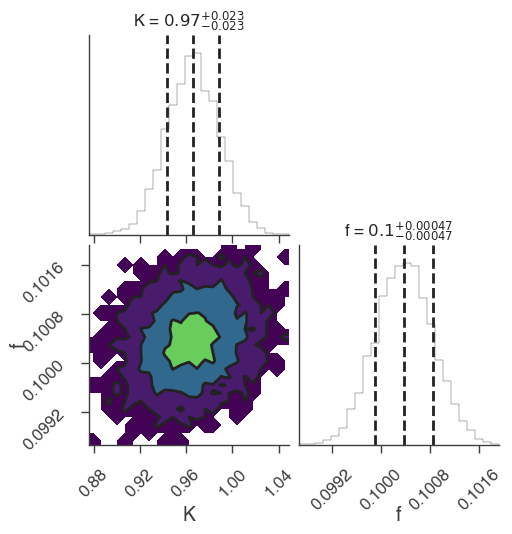

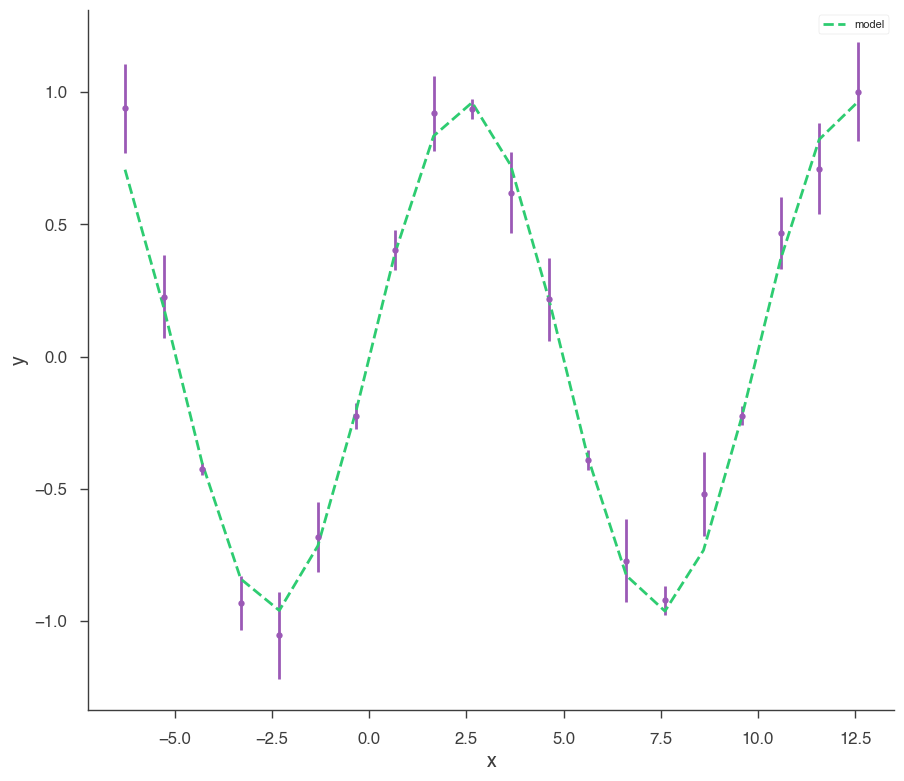

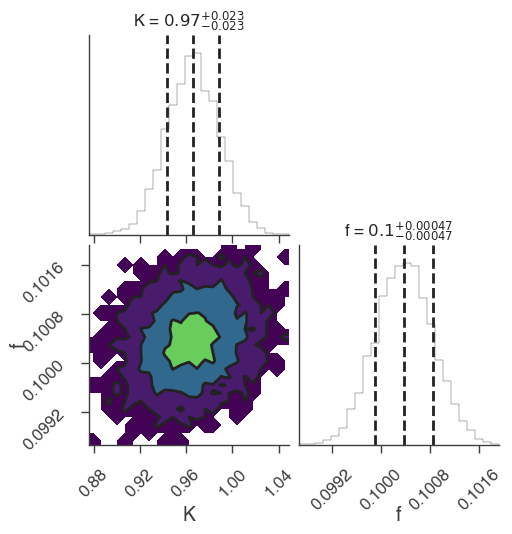

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

18:10:23 INFO      sampler set to zeus                                                     ]8;id=793316;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=172422;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:13, 45.73it/s]

Sampling progress :   2%|▏         | 11/625 [00:00<00:15, 39.78it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:15, 40.11it/s]

Sampling progress :   4%|▎         | 23/625 [00:00<00:12, 48.34it/s]

Sampling progress :   5%|▍         | 30/625 [00:00<00:11, 52.58it/s]

Sampling progress :   6%|▌         | 36/625 [00:00<00:11, 53.47it/s]

Sampling progress :   7%|▋         | 43/625 [00:00<00:10, 57.28it/s]

Sampling progress :   8%|▊         | 49/625 [00:00<00:10, 54.77it/s]

Sampling progress :   9%|▉         | 55/625 [00:01<00:10, 53.99it/s]

Sampling progress :  10%|▉         | 61/625 [00:01<00:10, 54.68it/s]

Sampling progress :  11%|█         | 67/625 [00:01<00:10, 52.72it/s]

Sampling progress :  12%|█▏        | 73/625 [00:01<00:10, 53.77it/s]

Sampling progress :  13%|█▎        | 79/625 [00:01<00:10, 51.05it/s]

Sampling progress :  14%|█▎        | 85/625 [00:01<00:10, 52.53it/s]

Sampling progress :  15%|█▍        | 92/625 [00:01<00:09, 56.86it/s]

Sampling progress :  16%|█▌        | 98/625 [00:01<00:09, 56.83it/s]

Sampling progress :  17%|█▋        | 106/625 [00:01<00:08, 61.78it/s]

Sampling progress :  18%|█▊        | 113/625 [00:02<00:08, 57.09it/s]

Sampling progress :  19%|█▉        | 119/625 [00:02<00:09, 52.25it/s]

Sampling progress :  20%|██        | 125/625 [00:02<00:09, 50.03it/s]

Sampling progress :  21%|██        | 131/625 [00:02<00:09, 49.67it/s]

Sampling progress :  22%|██▏       | 138/625 [00:02<00:09, 53.91it/s]

Sampling progress :  23%|██▎       | 144/625 [00:02<00:08, 53.73it/s]

Sampling progress :  24%|██▍       | 150/625 [00:02<00:08, 54.26it/s]

Sampling progress :  25%|██▌       | 159/625 [00:02<00:07, 61.91it/s]

Sampling progress :  27%|██▋       | 166/625 [00:03<00:07, 63.82it/s]

Sampling progress :  28%|██▊       | 173/625 [00:03<00:07, 62.54it/s]

Sampling progress :  29%|██▉       | 180/625 [00:03<00:07, 60.52it/s]

Sampling progress :  30%|██▉       | 187/625 [00:03<00:07, 57.89it/s]

Sampling progress :  31%|███       | 195/625 [00:03<00:06, 62.40it/s]

Sampling progress :  32%|███▏      | 202/625 [00:03<00:06, 62.11it/s]

Sampling progress :  33%|███▎      | 209/625 [00:03<00:06, 63.96it/s]

Sampling progress :  35%|███▍      | 217/625 [00:03<00:06, 66.66it/s]

Sampling progress :  36%|███▌      | 224/625 [00:03<00:06, 59.71it/s]

Sampling progress :  37%|███▋      | 231/625 [00:04<00:06, 59.28it/s]

Sampling progress :  38%|███▊      | 238/625 [00:04<00:06, 62.06it/s]

Sampling progress :  39%|███▉      | 246/625 [00:04<00:05, 65.64it/s]

Sampling progress :  41%|████      | 255/625 [00:04<00:05, 69.33it/s]

Sampling progress :  42%|████▏     | 262/625 [00:04<00:05, 68.11it/s]

Sampling progress :  43%|████▎     | 269/625 [00:04<00:05, 59.43it/s]

Sampling progress :  44%|████▍     | 276/625 [00:04<00:06, 57.80it/s]

Sampling progress :  45%|████▌     | 282/625 [00:04<00:06, 56.70it/s]

Sampling progress :  46%|████▌     | 289/625 [00:05<00:05, 58.69it/s]

Sampling progress :  47%|████▋     | 295/625 [00:05<00:05, 58.41it/s]

Sampling progress :  48%|████▊     | 302/625 [00:05<00:05, 61.32it/s]

Sampling progress :  50%|████▉     | 310/625 [00:05<00:04, 66.28it/s]

Sampling progress :  51%|█████     | 317/625 [00:05<00:05, 59.79it/s]

Sampling progress :  52%|█████▏    | 324/625 [00:05<00:05, 59.61it/s]

Sampling progress :  53%|█████▎    | 331/625 [00:05<00:05, 57.39it/s]

Sampling progress :  54%|█████▍    | 337/625 [00:05<00:05, 51.85it/s]

Sampling progress :  55%|█████▍    | 343/625 [00:06<00:05, 52.57it/s]

Sampling progress :  56%|█████▌    | 349/625 [00:06<00:05, 53.56it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:06<00:05, 53.85it/s]

Sampling progress :  58%|█████▊    | 361/625 [00:06<00:05, 50.66it/s]

Sampling progress :  59%|█████▊    | 367/625 [00:06<00:05, 44.06it/s]

Sampling progress :  60%|█████▉    | 372/625 [00:06<00:05, 44.77it/s]

Sampling progress :  60%|██████    | 378/625 [00:06<00:05, 46.65it/s]

Sampling progress :  62%|██████▏   | 385/625 [00:06<00:04, 51.65it/s]

Sampling progress :  63%|██████▎   | 391/625 [00:07<00:04, 50.25it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:07<00:04, 51.05it/s]

Sampling progress :  64%|██████▍   | 403/625 [00:07<00:04, 49.46it/s]

Sampling progress :  65%|██████▌   | 409/625 [00:07<00:04, 48.46it/s]

Sampling progress :  66%|██████▋   | 415/625 [00:07<00:04, 51.22it/s]

Sampling progress :  68%|██████▊   | 422/625 [00:07<00:03, 56.23it/s]

Sampling progress :  68%|██████▊   | 428/625 [00:07<00:03, 55.77it/s]

Sampling progress :  70%|██████▉   | 435/625 [00:07<00:03, 55.33it/s]

Sampling progress :  71%|███████   | 441/625 [00:07<00:03, 52.84it/s]

Sampling progress :  72%|███████▏  | 447/625 [00:08<00:03, 52.10it/s]

Sampling progress :  72%|███████▏  | 453/625 [00:08<00:03, 49.18it/s]

Sampling progress :  73%|███████▎  | 459/625 [00:08<00:03, 51.92it/s]

Sampling progress :  74%|███████▍  | 465/625 [00:08<00:03, 49.53it/s]

Sampling progress :  75%|███████▌  | 471/625 [00:08<00:03, 48.38it/s]

Sampling progress :  76%|███████▌  | 476/625 [00:08<00:03, 47.19it/s]

Sampling progress :  77%|███████▋  | 482/625 [00:08<00:02, 49.13it/s]

Sampling progress :  78%|███████▊  | 489/625 [00:08<00:02, 53.53it/s]

Sampling progress :  79%|███████▉  | 496/625 [00:08<00:02, 57.63it/s]

Sampling progress :  81%|████████  | 504/625 [00:09<00:01, 63.24it/s]

Sampling progress :  82%|████████▏ | 511/625 [00:09<00:01, 61.94it/s]

Sampling progress :  83%|████████▎ | 518/625 [00:09<00:01, 59.21it/s]

Sampling progress :  84%|████████▍ | 524/625 [00:09<00:01, 55.57it/s]

Sampling progress :  85%|████████▍ | 531/625 [00:09<00:01, 57.70it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:09<00:01, 58.03it/s]

Sampling progress :  87%|████████▋ | 543/625 [00:09<00:01, 58.27it/s]

Sampling progress :  88%|████████▊ | 549/625 [00:09<00:01, 58.50it/s]

Sampling progress :  89%|████████▉ | 557/625 [00:10<00:01, 62.95it/s]

Sampling progress :  90%|█████████ | 564/625 [00:10<00:00, 61.39it/s]

Sampling progress :  91%|█████████▏| 571/625 [00:10<00:00, 55.17it/s]

Sampling progress :  92%|█████████▏| 577/625 [00:10<00:00, 52.71it/s]

Sampling progress :  93%|█████████▎| 583/625 [00:10<00:00, 54.46it/s]

Sampling progress :  94%|█████████▍| 589/625 [00:10<00:00, 52.52it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:10<00:00, 52.72it/s]

Sampling progress :  96%|█████████▌| 601/625 [00:10<00:00, 49.32it/s]

Sampling progress :  97%|█████████▋| 607/625 [00:11<00:00, 45.76it/s]

Sampling progress :  98%|█████████▊| 612/625 [00:11<00:00, 44.45it/s]

Sampling progress :  99%|█████████▉| 618/625 [00:11<00:00, 46.14it/s]

Sampling progress : 100%|█████████▉| 623/625 [00:11<00:00, 46.99it/s]

Sampling progress : 100%|██████████| 625/625 [00:11<00:00, 54.73it/s]

18:10:35 INFO      fit restored to maximum of posterior                                         ]8;id=684725;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=964126;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=925633;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=272903;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 29


Scale Factor: 1.136716


Mean Integrated Autocorrelation Time: 3.2


Effective Sample Size: 3912.06


Number of Log Probability Evaluations: 66073


Effective Samples per Log Probability Evaluation: 0.059208


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.66 -0.24 +0.22) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.004 +/- 0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-4.606695
total,-4.606695


Values of statistical measures:

,statistical measures
AIC,13.919273
BIC,15.204855
DIC,13.282822
PDIC,2.034178


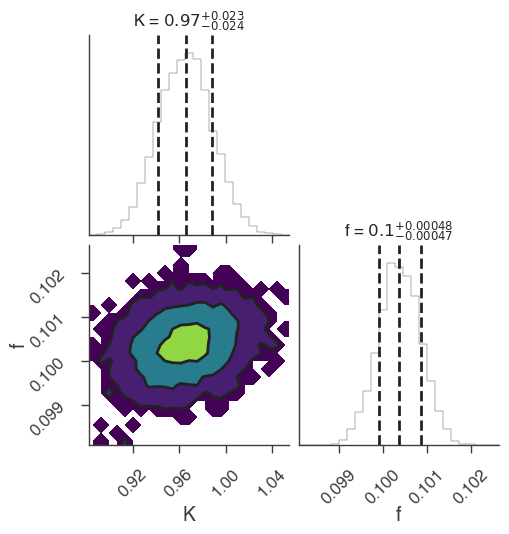

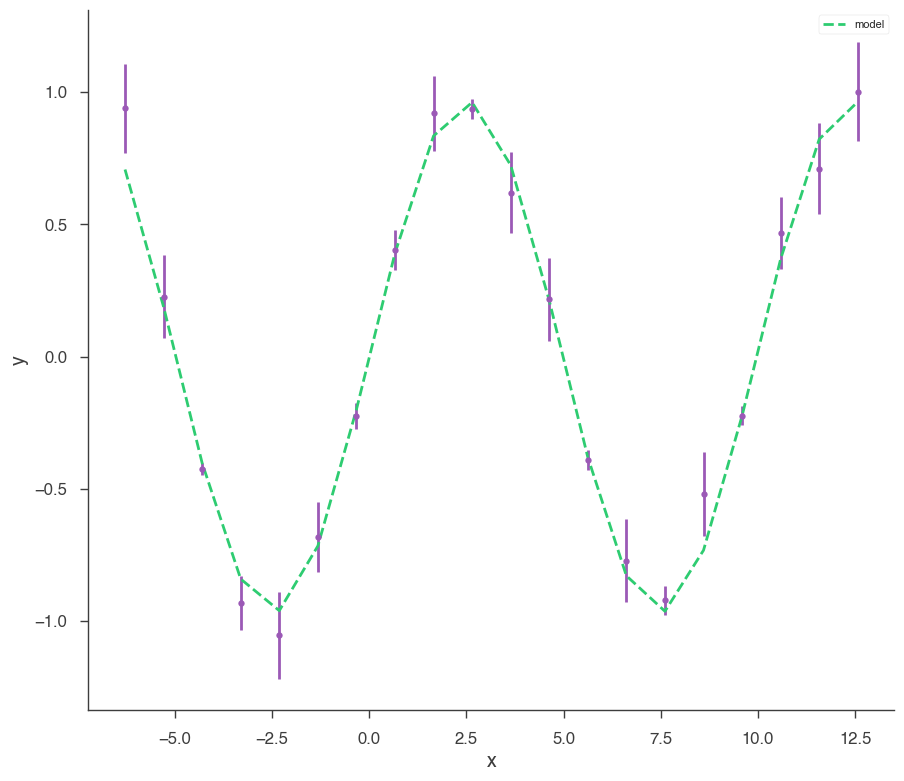

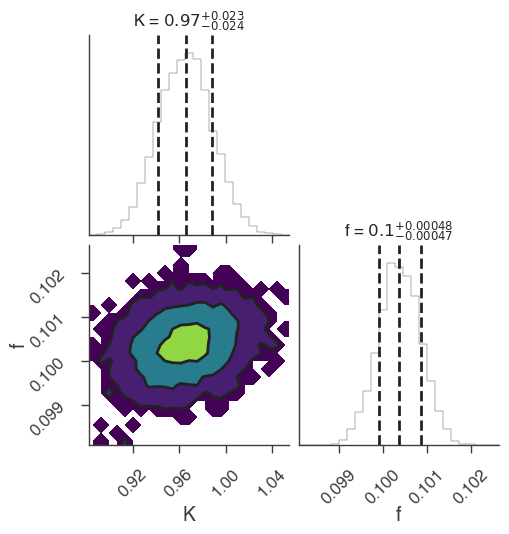

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

18:10:36 INFO      sampler set to ultranest                                                ]8;id=769;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=362579;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5  


[ultranest] Likelihood function evaluations: 9701


[ultranest]   logZ = -13.55 +- 0.1041


[ultranest] Effective samples strategy satisfied (ESS = 985.3, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


18:10:47 INFO      fit restored to maximum of posterior                                         ]8;id=690303;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=529505;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=218019;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=193588;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 -0.26 +0.24) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.004 -0.005 +0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-4.609559
total,-4.609559


Values of statistical measures:

,statistical measures
AIC,13.925001
BIC,15.210583
DIC,13.379058
PDIC,2.082671
log(Z),-5.867130


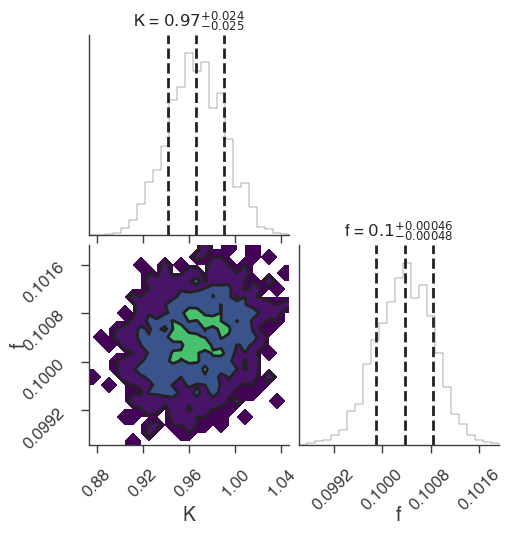

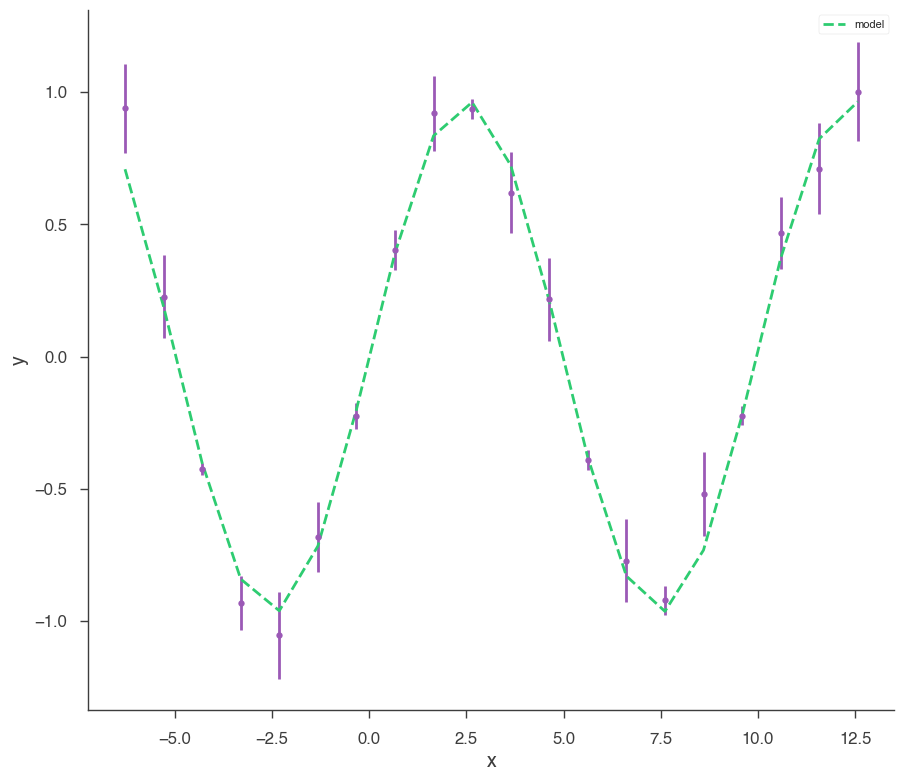

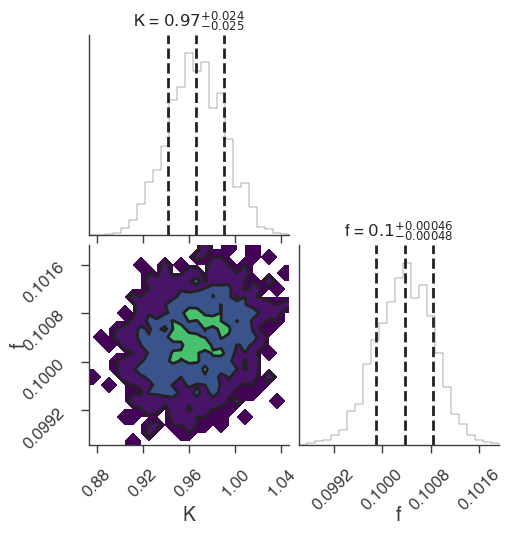

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()